In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("spam.tsv",sep="\t")

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


###### null values

In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


### countplot

<AxesSubplot:xlabel='label', ylabel='count'>

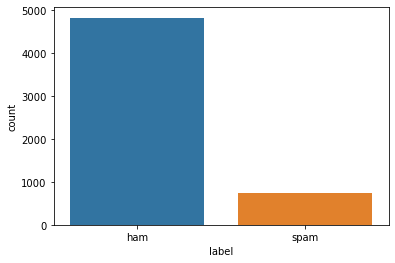

In [8]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot(df["label"])

In [9]:
(df["label"]=="ham").sum()

4825

In [10]:
(df["label"]=="spam").sum()

747

In [11]:
ham=df[df["label"]=="ham"]

In [12]:
spam=df[df["label"]=="spam"]

In [13]:
#since there is a huge gap bw number of ham and spam so we will bring the number of spam and ham into almost same range

In [14]:
ham=ham.sample(spam.shape[0])

In [15]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [16]:
data=ham.append(spam,ignore_index=True)

In [17]:
data.shape

(1494, 4)

In [18]:
data.head()

,label,message,length,punct
0,ham,Can you pls send me that company name. In saib...,56,1
1,ham,Yes when is the appt again?,27,1
2,ham,"I got like $ &lt;#&gt; , I can get some more l...",85,8
3,ham,Havent shopping now lor i juz arrive only,41,0
4,ham,Dont talk to him ever ok its my word.,37,1


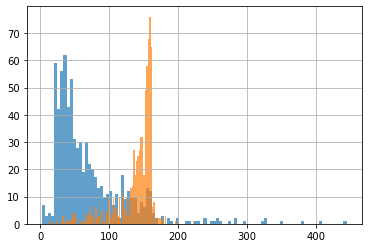

In [19]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.grid()
plt.show()

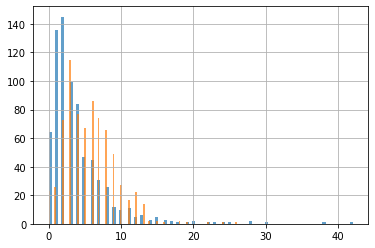

In [20]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.grid()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(data["message"],data["label"],test_size=0.3,random_state=0,shuffle=True)

In [23]:
x_train.shape

(1045,)

In [24]:
y_train.shape

(1045,)

In [25]:
x_test.shape

(449,)

In [26]:
y_test.shape

(449,)

##### Building the Model (Random Forest) 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
clf=Pipeline([("tfidf",TfidfVectorizer()),("rfc",RandomForestClassifier(n_estimators=20))])

In [31]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=20))])

In [32]:
y_pred=clf.predict(x_test)

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [34]:
accuracy_score(y_test, y_pred)

0.9309576837416481

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.93       227
        spam       0.98      0.88      0.93       222

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



In [36]:
print(confusion_matrix(y_test,y_pred))

[[222   5]
 [ 26 196]]


#####  Building the Model (SVM) 

In [37]:
from sklearn.svm import SVC

In [38]:
clf2=Pipeline([("tfidf",TfidfVectorizer()),("clf",SVC(C = 100, gamma='auto'))])

In [39]:
clf2.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=100, gamma='auto'))])

In [40]:
y_pred=clf2.predict(x_test)

In [41]:
accuracy_score(y_test, y_pred)

0.9576837416481069

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.93      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [43]:
print(confusion_matrix(y_test,y_pred))

[[224   3]
 [ 16 206]]


#### predicting on our data 

In [44]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [45]:
print(clf.predict(test1))
print(clf.predict(test2))
print(clf.predict(test3))

['ham']
['ham']
['spam']


In [46]:
print(clf2.predict(test1))
print(clf2.predict(test2))
print(clf2.predict(test3))

['ham']
['ham']
['spam']
